To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
  <a href="https://github.com/unslothai/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/u54VK8m8tk"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
  <a href="https://ko-fi.com/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Kofi button.png" width="145"></a></a> Join Discord if you need help + support us if you can!
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://github.com/unslothai/unsloth#installation-instructions---conda).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save) (eg for Llama.cpp).

## Kaggle is slow - you'll have to wait **5 minutes** for it to install.

I suggest you to use our free Colab notebooks instead. I linked our Mistral Colab notebook here: [notebook](https://colab.research.google.com/drive/1Dyauq4kTZoLewQ1cApceUQVNcnnNTzg_?usp=sharing)

In [1]:
%%capture
!pip install -U "xformers<0.0.26" --index-url https://download.pytorch.org/whl/cu121
!pip install "unsloth[kaggle-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install evaluate
!pip install bert_score
# Temporary fix for https://github.com/huggingface/datasets/issues/6753
!pip install datasets==2.16.0 fsspec==2023.10.0 gcsfs==2023.10.0

import os
os.environ["WANDB_DISABLED"] = "true"

!pip install langchain
!pip install langchain-community

* We support Llama, Mistral, CodeLlama, TinyLlama, Vicuna, Open Hermes etc
* And Yi, Qwen ([llamafied](https://huggingface.co/models?sort=trending&search=qwen+llama)), Deepseek, all Llama, Mistral derived archs.
* We support 16bit LoRA or 4bit QLoRA. Both 2x faster.
* `max_seq_length` can be set to anything, since we do automatic RoPE Scaling via [kaiokendev's](https://kaiokendev.github.io/til) method.
* [**NEW**] With [PR 26037](https://github.com/huggingface/transformers/pull/26037), we support downloading 4bit models **4x faster**! [Our repo](https://huggingface.co/unsloth) has Llama, Mistral 4bit models.

In [2]:
# from unsloth import FastLanguageModel
# import torch
# max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
# dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
# load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# # 4bit pre quantized models we support for 4x faster downloading + no OOMs.
# fourbit_models = [
#     "unsloth/mistral-7b-bnb-4bit",
#     "unsloth/mistral-7b-instruct-v0.2-bnb-4bit",
#     "unsloth/llama-2-7b-bnb-4bit",
#     "unsloth/llama-2-13b-bnb-4bit",
#     "unsloth/codellama-34b-bnb-4bit",
#     "unsloth/tinyllama-bnb-4bit",
#     "unsloth/gemma-7b-bnb-4bit", # New Google 6 trillion tokens model 2.5x faster!
#     "unsloth/gemma-2b-bnb-4bit",
# ] # More models at https://huggingface.co/unsloth

# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name = "unsloth/mistral-7b-bnb-4bit", # Choose ANY! eg mistralai/Mistral-7B-Instruct-v0.2
#     max_seq_length = max_seq_length,
#     dtype = dtype,
#     load_in_4bit = load_in_4bit,
#     # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
# )

In [3]:
from unsloth import FastLanguageModel
import torch

# Configuration
max_seq_length = 2048
dtype = None  # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage.

# Initialize the model and tokenizer
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/mistral-7b-bnb-4bit",
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit
)

2024-05-12 09:18:01.241293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 09:18:01.241416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 09:18:01.343921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

==((====))==  Unsloth: Fast Mistral patching release 2024.4
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.2.2+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. Xformers = 0.0.25.post1. FA = False.
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


model.safetensors:   0%|          | 0.00/4.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/971 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

We now add LoRA adapters so we only need to update 1 to 10% of all parameters!

Loading the Data

In [4]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("daily_dialog")
# Assuming eval_dataset['dialog'] contains a list of conversations
eval_dataset = load_dataset("daily_dialog" , split="validation")

eval_dialogs = eval_dataset['dialog']

# Create a DataFrame with a single column 'conversation'
eval_dialog_dataset = pd.DataFrame({'conversation': eval_dialogs})

print(eval_dialog_dataset.head())


Generating train split:   0%|          | 0/11118 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

                                        conversation
0  [Good morning , sir . Is there a bank near her...
1  [Good afternoon . This is Michelle Li speaking...
2  [What qualifications should a reporter have ? ...
3  [Hi , good morning , Miss ? what can I help yo...
4  [Excuse me , ma'am . Can you tell me where the...


In [5]:
from transformers import GenerationConfig, LlamaForCausalLM, LlamaTokenizer
generation_config = GenerationConfig.from_pretrained("unsloth/mistral-7b-bnb-4bit")

In [6]:
eval_dialog_dataset = eval_dialog_dataset[:100]

In [7]:

def format_prompt(prompt: str, system_prompt: str) -> str:
    return f"""
{system_prompt}
{prompt}
""".strip()
     

def generate_response(prompt: str, max_new_tokens: int = 128) -> str:
    encoding = tokenizer(prompt, return_tensors="pt").to(model.device)
    with torch.inference_mode():
        outputs = model.generate(
            **encoding,
            max_new_tokens=max_new_tokens,
            temperature=0,
            generation_config=generation_config,
        )
    answer_tokens = outputs[:, encoding.input_ids.shape[1] :]
    return tokenizer.decode(answer_tokens[0], skip_special_tokens=True)
     


In [8]:
def parse_output(output_string):
    # Split the output string by newline characters
    lines = output_string.split('\n')
    
    # Iterate through the lines to find the first answer from Jack
    for line in lines:
        if line.startswith("Jack:"):
            # Extract the answer by removing "Jack:" and any leading/trailing whitespace
            answer = line.replace("Jack:", "").strip()
            return answer

In [18]:
def checking_prediction(prediction):
#     if (len(prediction)%2==0):
#         prediction.pop()
    prediction=["" if output is None else output for output in prediction]
    return prediction


In [17]:
new_eval_dataset = eval_dataset[:10]


In [28]:
SYSTEM_PROMPT = """
You are a conversation AI assistant named Jack that helps other humans in developing their conversational skills. You are friendly and truthful and keep the conversation candid. Give only a SINGLE response to the human input.
""".strip()

prediction = []
reference = []
for j in range(50):
    temp_pred=[]
    temp_ref = []
    convo = eval_dataset[j]['dialog']
    print(convo,"\n")
    print("convo length:" , len(convo))
    if(len(convo)%2!=0):
        convo.pop()
    for i in range(len(convo)):
        if i % 2 == 0:
            # Format the human input into the prompt
            prompt = f"Human: {convo[i]}"
            response = generate_response(format_prompt(prompt, SYSTEM_PROMPT), max_new_tokens=50)
            if response == None:
                response =""
            
            temp_pred.append(parse_output(response))
        else:
            
            reference.append(convo[i])
            temp_ref.append(convo[i])
    temp_pred = checking_prediction(temp_pred)
    print("length of temp_ref: ", len(temp_ref))
    print("length of temp_pred: " , len(temp_pred))
    
    for output in temp_pred:
        prediction.append(output)
    print("temp_ref: ", temp_ref)
    print("temp_pred: " , temp_pred)


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


['Good morning , sir . Is there a bank near here ? ', ' There is one . 5 blocks away from here ? ', " Well , that's too far.Can you change some money for me ? ", ' Surely , of course . What kind of currency have you got ? ', ' RIB . ', ' How much would you like to change ? ', ' 1000 Yuan.Here you are . '] 

convo length: 7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' There is one . 5 blocks away from here ? ', ' Surely , of course . What kind of currency have you got ? ', ' How much would you like to change ? ']
temp_pred:  ['Yes, there is a bank near here.', 'Sure, I can change some money for you.', '']
['Good afternoon . This is Michelle Li speaking , calling on behalf of IBA . Is Mr Meng available at all ? ', ' This is Mr Meng speaking , Michelle . ', " Oh , hello ! Sorry about that . I'm just calling to say that we've received your new Corporate Credit Card from HQ . ", " That was quick ! I wasn't expecting it until later this week . ", ' Yes , our application procedures have speeded up since we started using the new fast-track system . ', ' Shall I come in and collect it ? ', " Or we can send it to you . But if you would like to use it at the ATM , you'll need to wait for your PIN number . ", ' Mmmm ... if I come in and collect it this afternoon , is there any way I could use it toda

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [' This is Mr Meng speaking , Michelle . ', " That was quick ! I wasn't expecting it until later this week . ", ' Shall I come in and collect it ? ', ' Mmmm ... if I come in and collect it this afternoon , is there any way I could use it today ? Petty cash is getting low , so I need to draw some money . ', " I see . Yes , that's fine . I'll be there at around 2:30 pm . See you later , and thanks . "]
temp_pred:  ["Good afternoon Michelle. I'm afraid Mr Meng is not available at the moment. Would you like to leave a message ?", '', 'I see.', "I'm sorry, I don't understand.", "I'm sorry, but I don't understand what you mean."]
['What qualifications should a reporter have ? ', ' As a reporter , he must have acute insight and language skills . At the same time , he must have good judgment , the respect for his job and tactical cooperation with others . ', " Can you work under pressure ? You know , people working here are all busy eve

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  2
length of temp_pred:  2
temp_ref:  [' As a reporter , he must have acute insight and language skills . At the same time , he must have good judgment , the respect for his job and tactical cooperation with others . ', " I think I've got used to work under pressure . I will adjust myself to the step of your newspaper quickly . "]
temp_pred:  ['A reporter should have a degree in journalism or a related field, strong writing skills, and experience in research and fact-checking. They should also be able to work well under pressure and be able to handle sensitive information.', 'I can work under pressure.']
['Hi , good morning , Miss ? what can I help you with ? ', " Good morning I'd like to mail this box of books to Taiwan . ", ' OK , please put it on this scale.Airmail or by sea ? ', ' How long does it take to reach Taiwan by sea ? ', ' Usually about two month . ', " That's too long.How long does it take to reach Taiwan by airmail ? ", ' About ten days . ', ' Then ho

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  8
length of temp_pred:  8
temp_ref:  [" Good morning I'd like to mail this box of books to Taiwan . ", ' How long does it take to reach Taiwan by sea ? ', " That's too long.How long does it take to reach Taiwan by airmail ? ", ' Then how much is that by airmail ? ', " That's a little bit expensive . ", ' I guess I have to send it by airmail . ', ' Yes , please . ', ' OK . ']
temp_pred:  ['Hi , good morning , Miss ? what can I help you with ?', "I'm sorry, I don't understand.", "That's a long time.", "That's a long time.", '', '', 'I am not sure what you mean.', '']
["Excuse me , ma'am . Can you tell me where the nearest postoffice is ? ", " Of course . Go straight ahead . Turn right at the next street . You'll see a tall , yellow building.The post office is on the first floor . ", ' Do you mean that I go that way for one block , then turn right ? ', ' Yes , you are right . ', ' Is it far ? ', " No , It's only about five minutes ' walk . ", ' Thank you very much . '

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [" Of course . Go straight ahead . Turn right at the next street . You'll see a tall , yellow building.The post office is on the first floor . ", ' Yes , you are right . ', " No , It's only about five minutes ' walk . ", " It's my pleasure . "]
temp_pred:  ['Sure, the nearest post office is located at 123 Main Street.', 'Yes, that is correct.', 'It is 10 miles away.', 'You are welcome.']
['Could you give me some advice on how to bring up my son properly ? ', " He's a bright boy , isn't he ? ", ' But he always wimps out of difficulty . ', " Don't worry , he'll make good progress step by step . "] 

convo length: 4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  2
length of temp_pred:  2
temp_ref:  [" He's a bright boy , isn't he ? ", " Don't worry , he'll make good progress step by step . "]
temp_pred:  ["I'm sorry, but I'm not sure I can help you with that. I'm not a parenting expert.", "I'm sorry, I don't understand."]
["I'm in 507 . I have a few problems with my room . ", ' What is that problem , sir ? ', ' There are cockroaches in my room . ', ' Are you sure , sir ? Flies I could believe , but cockroaches ? ', " I've counted nine different cockroaches , and I accidentally stepped on another one . ", ' Sir , we run a spotless and cockroach-less hotel . ', ' You dare to doubt me ? ', " I'm sorry , sir . Let me transfer you to my supervisor . "] 

convo length: 8


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [' What is that problem , sir ? ', ' Are you sure , sir ? Flies I could believe , but cockroaches ? ', ' Sir , we run a spotless and cockroach-less hotel . ', " I'm sorry , sir . Let me transfer you to my supervisor . "]
temp_pred:  ['What are the problems?', 'I am sorry to hear that.', "I'm sorry to hear that.", "I am sorry, I don't understand."]
["Excuse me , sir , I'm afraid you can't park your car here . ", " Why not ? It's my parking space . ", " I'm afraid not , sir . ", " Oh ? That's a surprise . Let me see ... D 0411 Our dog's birthday . Yes , I'm sure this my parking space ! ", ' But I saw a red car always parking here before . ', " Oh , we've just repainted our car . It was red . ", ' Maybe . But the car of this space has a broken rearview mirror on the left . ', ' Yeah . It used to . We got that fixed yesterday too . ', " Could you wait for a minute , sir ? I'd like to have a check . ", ' Sure , go ahead . ', ' Sorry 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  6
length of temp_pred:  6
temp_ref:  [" Why not ? It's my parking space . ", " Oh ? That's a surprise . Let me see ... D 0411 Our dog's birthday . Yes , I'm sure this my parking space ! ", " Oh , we've just repainted our car . It was red . ", ' Yeah . It used to . We got that fixed yesterday too . ', ' Sure , go ahead . ', " That's all right . It's not your fault . "]
temp_pred:  ["I'm sorry , but I'm not a car .", "I'm sorry to hear that.", "I am sorry, I don't know what you mean.", 'I see .', "Sure, I'll wait for you.", 'I am not sure what you mean.']
['What can I do for you today ? ', ' I need to buy a new refrigerator today . ', ' Were you looking at a particular refrigerator ? ', ' I like that Kenmore refrigerator . ', ' This particular refrigerator is a very good choice . ', ' Tell me about it . ', ' Not only is it affordable , but it comes with all the appliances . ', ' What are the appliances . ', ' It has an ice maker , water dispenser , and plenty of room

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  6
length of temp_pred:  6
temp_ref:  [' I need to buy a new refrigerator today . ', ' I like that Kenmore refrigerator . ', ' Tell me about it . ', ' What are the appliances . ', " I'd like to see it for myself . ", ' I like what I see . ']
temp_pred:  ['I can help you with your conversational skills.', 'I was looking at a particular refrigerator.', 'I agree.', "I'm sorry, I don't understand.", "I don't know what you mean by that .", "I'm not sure what you mean."]
["Oh , well . It was fun to be the winner . But ... it's too big . I must be an extra small in the States . ", ' So what about the tennis racket ? ', " Look ! It's amazing . I can't wait to try it out ! ", ' How much did that end up costing you ? ', ' Oh ... around twenty bucks . A bargain if you ask me . Look at the picture of her playing with it ! ', " Hey , two for one . That's a super deal . ", " And here's her signature ! "] 

convo length: 7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' So what about the tennis racket ? ', ' How much did that end up costing you ? ', " Hey , two for one . That's a super deal . "]
temp_pred:  ["I'm sorry to hear that.", "I'm glad you're excited about it. I'm sure it will be a great experience.", '']
['Can I help you ? ', " I'm looking for someone who works here , but I lost his business card . His name's Long or Sang or something like that . ", ' Chang ? ', ' Yeah , that sounds right . ', ' There are about twenty people named Chang who work here . What department ? ', ' Let me think ... accounting , finance , something like that . ', ' Eric Chang in accounting ? ', " That's him ! ", " I'll call him and tell him you're here . ", ' I appreciate your help . ', " Would you like to have a seat over there ? It'll just be a minute . And can I have your name ? ", " Here's my card . ", " OK . I'll have him come up to get you . "] 

convo length: 13


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  6
length of temp_pred:  6
temp_ref:  [" I'm looking for someone who works here , but I lost his business card . His name's Long or Sang or something like that . ", ' Yeah , that sounds right . ', ' Let me think ... accounting , finance , something like that . ', " That's him ! ", ' I appreciate your help . ', " Here's my card . "]
temp_pred:  ['I am Jack, a conversation AI assistant. I can help you in developing your conversational skills.', 'Yes, I am.', "I don't know.", 'Yes, he is.', '', "Sure . I'd love to have a seat . And my name is Jack ."]
["Hello , Sir . You're here to discuss the Network Settlement Service , right ? ", " Yes , that's right . We want as much info as possible before we agree to anything . ", " Yes , it's important to be all clued up before you enter into any agreement . To make full use of the Network Settlement Service and take advantage of the whole banking system , we provide internal fund transfers , account inquiry , agency clearing to

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  2
length of temp_pred:  2
temp_ref:  [" Yes , that's right . We want as much info as possible before we agree to anything . ", ' So , do you think our corporation will be eligible for this ? ']
temp_pred:  ['Yes , I am here to discuss the Network Settlement Service .', "I'm sorry, but I don't understand what you mean. Could you please rephrase your question?"]
['Dear , time is up , let ’ s go there now . ', ' Just a minute . I ’ m putting on my clothes . ', ' Have you taken the key to the door ? ', ' Yes . Oh , dear , I can ’ t find my hairbrushes . Can you help me ? ', ' Where have you put it ? ', ' I put it in the dressing room . ', ' Are you sure ? ', ' Yes , quite sure . ', ' Then , have you looked downstairs ? ', ' Yes , I ’ Ve looked everywhere downstairs . ', ' Look , dear . It ’ s over there . ', ' Where ? ', ' On the floor . '] 

convo length: 13


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  6
length of temp_pred:  6
temp_ref:  [' Just a minute . I ’ m putting on my clothes . ', ' Yes . Oh , dear , I can ’ t find my hairbrushes . Can you help me ? ', ' I put it in the dressing room . ', ' Yes , quite sure . ', ' Yes , I ’ Ve looked everywhere downstairs . ', ' Where ? ']
temp_pred:  ['', 'I have not taken the key to the door.', 'I have put it in the drawer.', 'Yes, I am sure.', 'I have not looked downstairs.', 'I see .']
["Excuse me , sir . You can't park here . ", " I am just waiting for my friends . It won't be long . ", ' Sir , the curb here is not for parking . ', " But I didn't see the sign , Ma ’ am . ", ' There is a sign at the corner of the street . When you turned in here , you should have seen it . ', " I didn't see it . ", ' I am sorry , sir . I have to give you a ticket . You can appeal to the court within 14 days . You will avoid paying the fine if you can prove that you are not at fault . '] 

convo length: 7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [" I am just waiting for my friends . It won't be long . ", " But I didn't see the sign , Ma ’ am . ", " I didn't see it . "]
temp_pred:  ["I'm sorry, but I'm not a parking attendant. I'm a conversation AI assistant.", 'I see.', "I'm sorry, I didn't see the sign."]
['Are you a goal-oriented person ? ', ' Yes , I am . I always make a plan before I do anything . ', ' Where do you want to be in 5 years ? ', " I don't want to have a specific title . I just want to enjoy what I am doing . ", ' That sounds very reasonable . ', " It's the most important thing to me . ", ' If you are hired , how long do you plan to stay with us ? ', " That obviously depends on how things go - - whether I'm suited to the firm and the firm to me . ", ' Tell me about some of your recent goals and what you do to achieve them . ', ' I want to put my knowledge and experience to use in a challenging position . In order to achieve this goal , I just want to wor

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  7
length of temp_pred:  7
temp_ref:  [' Yes , I am . I always make a plan before I do anything . ', " I don't want to have a specific title . I just want to enjoy what I am doing . ", " It's the most important thing to me . ", " That obviously depends on how things go - - whether I'm suited to the firm and the firm to me . ", ' I want to put my knowledge and experience to use in a challenging position . In order to achieve this goal , I just want to work step by step . ', " I haven't thought it over at all . ", ' I think the most important thing is the interest in the job . ']
temp_pred:  ['I am not a goal-oriented person. I am a conversation AI assistant.', 'I want to be in a place where I can help people in developing their conversational skills.', 'I agree.', 'I am not sure. I will stay as long as I am needed.', 'I have a few goals that I am working on right now. One of them is to improve my conversational skills. I am doing this by practicing with different peo

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' Certainly . May I see your social security and your ID , please . ', " Oh , current accounts don't pay out interest . ", " It's primarily designed for business transactions . That is , writing checks to pay for bills , buying things and sending money . We won't expect a large amount of deposit in a current account . "]
temp_pred:  ["Sure, I can help you with that. What's your name?", 'You can earn interest on your current account if you have a balance of £500 or more.', "I don't know."]
['Good morning , Helen . ', ' Good morning , Steven . ', " So , what's the status of our advertising campaign ? ", " It'll be a national campaign starting next week . ", ' What style will the ads be ? ', ' I suggest that we focus on slice of life , showing how you can beat the summer heat by biting into a cool ice-cream sandwich . ', ' Sounds like a good idea . Will we have a new slogan ? ', ' Definitely . '] 

convo length: 8


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [' Good morning , Steven . ', " It'll be a national campaign starting next week . ", ' I suggest that we focus on slice of life , showing how you can beat the summer heat by biting into a cool ice-cream sandwich . ', ' Definitely . ']
temp_pred:  ['Good morning , Helen .', "The campaign is running smoothly. We've seen a significant increase in engagement and conversions.", 'The ads will be in a conversational style.', "I don't know."]
["I'd like to taste some local dishes . What would you recommend ? ", " That's fine . You must try this dish . ", ' Could you tell me how this thing is cooked ? ', " It's fish steamed and served with our special sauce . ", ' Is it good ? ', " Sure . It's a most popular dish . ", " I think I'll try it , and give me some green salad together . ", ' We have two dressings for salad . Which one would you like ? ', ' What kind do you have ? ', ' We have French and Thousand Island . ', ' Make it Thousand 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [" That's fine . You must try this dish . ", " It's fish steamed and served with our special sauce . ", " Sure . It's a most popular dish . ", ' We have two dressings for salad . Which one would you like ? ', ' We have French and Thousand Island . ']
temp_pred:  ['I recommend you to try the local dishes at the restaurant "X".', "I'm not sure, but I can try to find out.", "I don't know.", "Sure, I'll add some green salad to your order.", 'I have a 2018 model.']
['Taxi ! ', ' Where will you go , sir ? ', ' Friendship Hotel . ', " OK , it's not far from here . ", ' I have something important to do , can you fast the speed ? ', " Sure , I'll try my best . Here we are . ", ' How much should I pay you ? ', ' The reading on the meter is 15 yuan . ', " Here's 20 yuan , keep the change . ", ' Thank you very much . '] 

convo length: 10


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [' Where will you go , sir ? ', " OK , it's not far from here . ", " Sure , I'll try my best . Here we are . ", ' The reading on the meter is 15 yuan . ', ' Thank you very much . ']
temp_pred:  ["I'm sorry, I don't know how to help you with that.", "I'm sorry, I don't understand.", "I am sorry, I can't do that.", 'I am not sure. I am not a human.', '']
['Mr . Johnson ’ s office . Cindy speaking . ', ' Hi , Cindy . It ’ s Michael Kurt . Is Mr . Johnson in ? ', ' No , I ’ m sorry , Mr . Kurt . He ’ s stepped out for a bit . Would you like me to have him call you ? ', ' Yeah , that ’ ll be great . I ’ m on extension 4283 . '] 

convo length: 4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  2
length of temp_pred:  2
temp_ref:  [' Hi , Cindy . It ’ s Michael Kurt . Is Mr . Johnson in ? ', ' Yeah , that ’ ll be great . I ’ m on extension 4283 . ']
temp_pred:  ['Hello Cindy . How can I help you ?', 'Sure .']
['Hi , Mark . ', ' Hi , Bill . I ’ d like to take the apartment I looked at yesterday . ', ' All right . ', ' So , what do we do now ? ', ' This is the lease . You should read the lease very carefully before you sign it because it describes your legal rights and responsibilities as a tenant . The lease also describes our rights and responsibilities as landlords . ', ' Okay . ( Reads the lease ) So , according to the lease , I ’ ll deposit one month ’ s rent as a security deposit , and I have to pay the first month ’ s rent in advance . I understand that I ’ ll get the security deposit back when I move out if the apartment does not need any costly repairs . ', ' Yes . If you do not damage the apartment , you will get your security deposit back when yo

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  6
length of temp_pred:  6
temp_ref:  [' Hi , Bill . I ’ d like to take the apartment I looked at yesterday . ', ' So , what do we do now ? ', ' Okay . ( Reads the lease ) So , according to the lease , I ’ ll deposit one month ’ s rent as a security deposit , and I have to pay the first month ’ s rent in advance . I understand that I ’ ll get the security deposit back when I move out if the apartment does not need any costly repairs . ', ' Can I pay you by check ? ', ' Is there a laundry room in the basement ? ', ' Can I sign the lease right now ? ']
temp_pred:  ['I am doing well. How are you?', 'All right.', 'I am not sure what you mean by "lease".', 'I will not damage the apartment .', "I'm sorry, I don't understand.", '']
['Good morning ! What can I do for you ? ', " I'm thinking of travelling to Suzhou in July . Could you recommend some tourist programs for that ? ", ' With pleasure . We arrange two kinds of tourist programs for Suzhou , a six-day tour by train 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [" I'm thinking of travelling to Suzhou in July . Could you recommend some tourist programs for that ? ", ' How much does a six-day tour by train cost ? ', ' Does that include hotels and meals ? ', ' That sounds reasonable . What about the five-day flying journey ? How much is that ? ', ' Covering all expenses ? ']
temp_pred:  ['Good morning ! I can help you with your conversational skills.', 'I am sorry , I do not understand .', "That's a lot of money.", 'I see .', "That's a lot of money."]
["I can't believe you wear jeans to the office ! Are you trying to lose your job ? ", " Of course not . I'm just observing casual day . On Fridays , the company doesn't require us to wear formal business attire . ", " Wow ! Nobody told me about that . Won't the relaxed dress code damage the company image ? ", " We don't think so . Casual days are becoming more common , and we believe employees can maintain a professional image without wearin

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [" Of course not . I'm just observing casual day . On Fridays , the company doesn't require us to wear formal business attire . ", " We don't think so . Casual days are becoming more common , and we believe employees can maintain a professional image without wearing uncomfortable clothes . ", " Not really . Besides , there is a separate dress code for casual day . People can't just wear whatever they want . ", ' Believe it or not , it has the opposite effect . Employees are actually more productive on casual days . ']
temp_pred:  ["I'm sorry, but I don't understand your question. Could you please rephrase it?", "I don't think so. The company is known for its relaxed culture and the dress code is just an extension of that.", "I think it's a good thing. It lets people express their individual tastes. But won't some people abuse it ?", 'I agree.']
['ABC Company , my name is Lucy . How can I help you ? ', ' Hello , Lucy , this is Mo

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' Hello , Lucy , this is Monica . I ’ m calling for the accountant position . I saw the information about the vacancy on your company ’ s website . Is it still available ? ', ' No , not yet . First , I want to check about the availability and see if you could give more information . ', ' The notification period of my current job is not that long and I ’ m quite profession to English and I am happy with the traveling abroad as I ’ m good dealing with the people from other cultures . It makes the whole job even more interesting . I will send my resume to you still this week . ']
temp_pred:  ['Hi Lucy, I am looking for a job in the ABC Company.', 'I have not sent my CV to you yet .', 'I am sorry, but I am not able to help you with this. I am not a human and I do not have the ability to understand your language.']
['Can I help you ? ', ' Yes , do you have any rooms available ? ', ' A single ? ', ' No . I need a double and three tri

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [' Yes , do you have any rooms available ? ', ' No . I need a double and three triples . My family is waiting for me in the car . ', ' Ok ... Here you are . ', ' Is breakfast included ? ']
temp_pred:  ['I am Jack, a conversation AI assistant. I can help you in developing your conversational skills.', 'What do you mean?', 'I am sorry, I am not able to fill out the form.', 'Thank you for your hospitality . I will check out at noon .']
["Why didn't you go to school yesterday ? ", " I stayed home because I wasn't feeling well . ", ' What was your problem ? ', ' My stomach was bothering me . ', ' Are you feeling any better ? ', " I'm still feeling a little sick . ", " I'm going to the store , would you like any Pesto Pistol ? ", " I'd appreciate that . "] 

convo length: 8


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [" I stayed home because I wasn't feeling well . ", ' My stomach was bothering me . ', " I'm still feeling a little sick . ", " I'd appreciate that . "]
temp_pred:  ['I was sick.', 'I was having a problem with my car.', 'I am feeling better.', 'I\'m not sure what you mean by "Pesto Pistol".']
['Excuse me , but please empty your pockets of all the metal things and put them in this tray . ', ' Including my keys ? ', ' Yes , and please step over there . ', ' All right . What shall I do now ? ', ' Just open your bags so we can check them . After that you can pick them up right behind that X-ray machine . ', " I've got film in my bag . ", " That's all right . This machine will not damage the film . ", " That's fine . ", ' Can I have your boarding pass ? We need to stamp it . ', ' Sure . Here you are . ', ' Thank you . ', ' Am I through now ? ', ' Yes . Here is your boarding pass . ', ' Thank you and goodbye . '] 

convo length: 14


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  7
length of temp_pred:  7
temp_ref:  [' Including my keys ? ', ' All right . What shall I do now ? ', " I've got film in my bag . ", " That's fine . ", ' Sure . Here you are . ', ' Am I through now ? ', ' Thank you and goodbye . ']
temp_pred:  ["I'm sorry, but I don't have any metal things in my pockets.", "I'm sorry, I don't understand.", "I'm sorry, I don't understand.", '', 'Sure, here you go.', "You're welcome.", 'Thank you .']
['Welcome to Flash Foot , sir.How can I help you ? ', ' I ’ d like extra prints made of these photos . ', ' Do you have your negatives ? ', ' Yes.Here they are . I ’ Ve marked how many prints I want on each shot . ', ' What size do you want the prints ? ', ' Four by six , except this one . I want a ten by thirteen print of this one . ', ' Okay , they ’ ll be ready for you in an hour . '] 

convo length: 7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' I ’ d like extra prints made of these photos . ', ' Yes.Here they are . I ’ Ve marked how many prints I want on each shot . ', ' Four by six , except this one . I want a ten by thirteen print of this one . ']
temp_pred:  ['I am looking for a pair of shoes.', 'I am not sure what you mean by that.', 'I want the prints to be the size of the original.']
['Is there anything I can do for you ? ', " I'm interested in taking a tour to Sydney . ", ' Well , we have a package tour there . ', ' How much does it cost ? ', ' $ 600 . ', ' Does that include the insurance ? ', ' Of course . '] 

convo length: 7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [" I'm interested in taking a tour to Sydney . ", ' How much does it cost ? ', ' Does that include the insurance ? ']
temp_pred:  ['I am a conversation AI assistant. I can help you in developing your conversational skills.', 'What is a package tour?', '']
['Hello , Mr . Wang . I am glad to meet you here at the fair . ', ' Like wise . Take a seat , please . How about a cup of tea ? ', ' Sure . Thank you . It seems your business is prosperous . There are many customers here . ', " Yes , it's not too bad . Our sales are going up year after year . And we still have a large potential production capacity . ", ' Well , what do you think of choosing a commission representative or agent abroad to promote your sales ? ', " That's a good idea . So far , we have several agents abroad . ", ' We are willing to be your agent in Thailand for hand-held tools . What do you think ? ', ' That sounds good . ', " Then , what's your usual commission r

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  9
length of temp_pred:  9
temp_ref:  [' Like wise . Take a seat , please . How about a cup of tea ? ', " Yes , it's not too bad . Our sales are going up year after year . And we still have a large potential production capacity . ", " That's a good idea . So far , we have several agents abroad . ", ' That sounds good . ', ' Usually , we give a commission of 4 % to our agents . ', " Don't worry . We'll allow you a higher commission rate if your sales score a substantial increase . ", ' It sounds OK . Then how do you pay the commission ? ', " All right . If it's okay , we would like to sign an agency agreement with you immediately . ", ' Thank you for your help . ']
temp_pred:  ['Hello , Mr . Wang . I am glad to meet you here at the fair .', 'I am glad to hear that.', 'I think it is a good idea to have a commission representative or agent abroad to promote your sales.', "I think that's a great idea!", '', '4 % is too low , I think . You see , we have a lot of work to 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [" I'm sorry . These batteries are not on sale . ", " I'm sorry . If you look at the ad again , you'll see that the other brand is on sale . ", ' Yes , many people make that mistake . ', " You're right . Many ads are like that . ", " Just one second , and I'll give you the batteries that are on sale . "]
temp_pred:  ["I'm glad these batteries are on sale.", '', '', '', "I'm glad you're here."]
['Hi , Jack , we are having a party tonight , wanna coming enjoy us ? You can bring your girlfriend , Tina . ', " I don't have a girlfriend . I'm single . ", " Oh , that's right . Well , there are going to be many beautiful girls at the party tonight , anyway . ", " No , I like being single . I never thought lonely , I'm focus on my career . Maybe I'll start to look for my girl when I achieve success . ", ' Why is that ? ', " Because I'm living a real world , a man enriched have a good career and make a lot of money . Franklin speaking the

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [" I don't have a girlfriend . I'm single . ", " No , I like being single . I never thought lonely , I'm focus on my career . Maybe I'll start to look for my girl when I achieve success . ", " Because I'm living a real world , a man enriched have a good career and make a lot of money . Franklin speaking the girls I've met wounldn't married a man wounldn't make enough money . "]
temp_pred:  ["I'm sorry , I'm not available tonight .", '', "I don't know."]
['So , Casey , how are things going with the photos for the press kit ? ', ' Yeah , I ’ Ve been meaning to talk to you about that . I might need to ask for an extension on that deadline . ', ' You ’ Ve had over a month to get this finalized ! Why are things delayed ? ', ' Well , the thing is , we ran into a lot of problems . . . ', ' I ’ m not looking for excuses here . I just want to get this finished on time ! ', ' I know , and I apologize for the delay . But some things were j

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' Yeah , I ’ Ve been meaning to talk to you about that . I might need to ask for an extension on that deadline . ', ' Well , the thing is , we ran into a lot of problems . . . ', ' I know , and I apologize for the delay . But some things were just beyond my control . I had trouble booking the photographer , and then Michael was sick for three weeks , so I couldn ’ t include him in the photos , and the design team lost all the files , so I had to re-do the pictures . ']
temp_pred:  ["I'm not sure. I haven't heard from him in a while.", 'I ’ m sorry, but I ’ m not sure what you mean. Can you please rephrase your question ?', 'I understand . I’ll do my best to help you get it done on time .']
['Yes , sir ? ', " Can I have Mr . J . Smith paged ? He said he'd be in the main dining room . I'm Mr . J . B . White . ", ' Who would you like to have paged again , sir ? ', ' Mr . J . Smith . ', ' Where would you like him to come ? ', ' To 

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [" Can I have Mr . J . Smith paged ? He said he'd be in the main dining room . I'm Mr . J . B . White . ", ' Mr . J . Smith . ', ' To the front desk . ']
temp_pred:  ['Yes, sir.', 'I would like to have paged again, sir.', 'I would like him to come to my house.']
['Can you help me find a lotion for a problem I am having ? ', ' That ’ s what I am here for . What questions can I answer for you ? ', ' I have poison oak , and I need help with the rash that won ’ t stop itching . ', ' The best product is Techne , and you can buy either the lotion or cream . ', ' Which one is best ? ', ' The cream form is very popular . ', ' Can I do anything else to help with the itching ? ', ' You could also take an antihistamine to help the rash go away quicker . ', ' I appreciate you helping me find a solution to the itching . ', ' Anytime you have a question , please feel free to ask . '] 

convo length: 10


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [' That ’ s what I am here for . What questions can I answer for you ? ', ' The best product is Techne , and you can buy either the lotion or cream . ', ' The cream form is very popular . ', ' You could also take an antihistamine to help the rash go away quicker . ', ' Anytime you have a question , please feel free to ask . ']
temp_pred:  ['I can help you find a lotion for a problem you are having.', 'I am sorry to hear that. I hope you feel better soon.', "I don't know.", 'You can try to avoid scratching.', 'I am glad to help you.']
['Excuse me . Something is wrong with my bank card . Can you help me ? ', " Yes . What's the problem ? ", " Just a mistake with my name . It should be issued as Steven , but the card is under the name ' Steven ' . ", " Oh , I am very sorry about that . It's our fault . I will arrange someone to correct it immediately . ", ' OK , no problem . To err is human . ', ' Anyway , we apologize for the incon

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [" Yes . What's the problem ? ", " Oh , I am very sorry about that . It's our fault . I will arrange someone to correct it immediately . ", ' Anyway , we apologize for the inconvenience we have brought you . Please just wait for a moment , and it will be fixed . ']
temp_pred:  ['Sure . What is the problem ?', 'I see .', 'To err is human, to forgive is divine.']
['We are doing Secret Santa at the office again this year . ', ' Whose name did you pick ? ', ' I got Jacob . Any ideas what to get him ? ', ' Booze ! ', ' Yeah , you ’ re right . Can ’ t go wrong with that . '] 

convo length: 5


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  2
length of temp_pred:  2
temp_ref:  [' Whose name did you pick ? ', ' Booze ! ']
temp_pred:  ["I'm not sure what that is.", 'I got Jacob . Any ideas what to get him ?']
['Is everything to your satisfaction ? ', ' No , the steak was recommended , but it is not very fresh . ', ' Oh , sorry to hear that . This is quite unusual . I will look into the matter . ', ' This is very annoying . ', " I'm sorry , sir . Do you wish to try something else ? That would be on the house , of course . ", " No , I don't risk it . ", ' How about a delicious dessert then , with our compliment ? ', " I'm not keen on dessert as a habit . They are fattening . ", " I see , sir . I'm sure everything will be right next time you come . "] 

convo length: 9


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [' No , the steak was recommended , but it is not very fresh . ', ' This is very annoying . ', " No , I don't risk it . ", " I'm not keen on dessert as a habit . They are fattening . "]
temp_pred:  ['Yes, everything is to my satisfaction.', 'I am sorry to hear that. This is quite unusual. I will look into the matter.', "I'm sorry, sir. Do you wish to try something else? That would be on the house, of course.", 'I\'m not sure what you mean by "dessert".']
['Excuse me , are you Jane ? ', " No , I'm Mary . ", ' Oh , are you in Class Four ? ', " No , I'm in Class There . "] 

convo length: 4


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  2
length of temp_pred:  2
temp_ref:  [" No , I'm Mary . ", " No , I'm in Class There . "]
temp_pred:  ['I am not Jane.', 'Yes, I am in Class Four.']
["Excuse me , but I'm not feeling too well . I think I'm going to throw up . ", " There's an airsickness bag behind the seat that's in front of you . ", " I must've missed it . ", ' Is this your first time flying ? ', " Yes . I'm going to San Francisco . ", " Oh , it's a beautiful city . I think you'll like it . ", " Hey , I'm feeling much better already . ", " Sometimes if you don't think about it , that sick feeling will go away on its own . ", ' Thanks . By the way , my name is Mary . ', " I'm Frank . Nice to meet you . "] 

convo length: 10


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [" There's an airsickness bag behind the seat that's in front of you . ", ' Is this your first time flying ? ', " Oh , it's a beautiful city . I think you'll like it . ", " Sometimes if you don't think about it , that sick feeling will go away on its own . ", " I'm Frank . Nice to meet you . "]
temp_pred:  ["I'm sorry to hear that. Do you need any help?", 'The name of the movie is "The Shawshank Redemption".', "I'm glad to hear that.", '', 'Nice to meet you Mary.']
["Welcome to Al's Bakery . What can I get you ? ", ' Hi ! Let me get a dozen croissants , four blueberry muffins and a loaf of sourdough bread . ', ' Sure . Would you like to have the loaf sliced ? ', " No , that's OK . Do you have any whole wheat bread ? ", ' We are out at the moment . May I suggest some rye bread ? ', ' Sure that sounds good . Do you have any cakes ? ', ' We have various birthday cakes and also ice cream cakes . ', " I'll just take a cheesecake . ",

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [' Hi ! Let me get a dozen croissants , four blueberry muffins and a loaf of sourdough bread . ', " No , that's OK . Do you have any whole wheat bread ? ", ' Sure that sounds good . Do you have any cakes ? ', " I'll just take a cheesecake . ", ' Yes . ']
temp_pred:  ["I'm looking for a cake.", 'Yes, I would like to have the loaf sliced.', 'I am not sure what you mean by rye bread.', 'I see.', 'Yes, that will be all.']
["Good morning , ladies and gentlemen , we are happy you have all come out for our training workshop . Today we have a great line-up of speakers to talk to you . First on our program is a well-renown expert in the field of international economic development , Harvard's own Dr . James Smith . Dr . Smith has been involved in economic research for over twenty years , and has taught at Harvard since 1995 . And now , without further adieu , we'd like to welcome Mr . James Smith . ", " Thank you , Mr . Jackson , ladies a

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  1
length of temp_pred:  1
temp_ref:  [" Thank you , Mr . Jackson , ladies and gentlemen , colleagues , friends . The subject of my talk is international relations in a morgen world . I plan to say a few words about the current situation in the Middle East and how it affects world economy . I'd like to give you an overview of the way that the economies of seemingly unrelated countries are intertwined . I've divided my talk into three parts , first an overview of international relations , second a discussion of current political situations , and lastly trends for the future . My presentation will take about two hours , but there will be a twenty-minute break in the middle . We'll stop for lunch at 12 . "]
temp_pred:  ['Thank you , and good morning . I\'m delighted to be here . I\'d like to begin by saying that I\'m not a big fan of the term " economic development " . I think it\'s a bit of']
["You're looking rather pale , why ? ", " I couldn't sleep well recently . "

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  4
length of temp_pred:  4
temp_ref:  [" I couldn't sleep well recently . ", ' I always drink too much wine in the evening . ', ' Yes , you are right . ', ' Many thanks for your advice . ']
temp_pred:  ["I'm not feeling well.", "I'm not sure what you mean.", "I'll drink less wine in the evening.", '']
['Hello Mrs Parker , how have you been ? ', ' Hello Dr Peters . Just fine thank you . Ricky and I are here for his vaccines . ', " Very well . Let's see , according to his vaccination record , Ricky has received his Polio , Tetanus and Hepatitis B shots . He is 14 months old , so he is due for Hepatitis A , Chickenpox and Measles shots . ", ' What about Rubella and Mumps ? ', ' Well , I can only give him these for now , and after a couple of weeks I can administer the rest . ', ' OK , great . Doctor , I think I also may need a Tetanus booster . Last time I got it was maybe fifteen years ago ! ', " We will check our records and I'll have the nurse administer and the boo

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' Hello Dr Peters . Just fine thank you . Ricky and I are here for his vaccines . ', ' What about Rubella and Mumps ? ', ' OK , great . Doctor , I think I also may need a Tetanus booster . Last time I got it was maybe fifteen years ago ! ']
temp_pred:  ['I am fine. How are you?', '', '']
['I ’ m interested in teaching at your school . ', ' Great . Are you a qualified teacher ? ', ' Yes . ', ' What kind of teaching certificate do you have ? ', ' I have a TEFL certificate . ', ' How many years of experience do you have ? ', ' I have three years of teaching ESL and four years of teaching per-school children . ', ' When did you get your TEFL certificate ? ', ' I got my TEFL certificate three years ago . ', ' Why do you want to teach at our school ? ', ' Well , I ’ Ve heard many good things about it . I also like teaching young children . ', ' That ’ s great . Can you speak Chinese ? ', ' Yes , just a little . ', ' Can you come in f

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  8
length of temp_pred:  8
temp_ref:  [' Great . Are you a qualified teacher ? ', ' What kind of teaching certificate do you have ? ', ' How many years of experience do you have ? ', ' When did you get your TEFL certificate ? ', ' Why do you want to teach at our school ? ', ' That ’ s great . Can you speak Chinese ? ', ' Can you come in for an interview tomorrow at 10:00 ? ', ' Great . See you then . ']
temp_pred:  ['I ’ m sorry, but we are not currently accepting applications for teaching positions.', '', "That's great! What's your favorite part about teaching English?", 'I have three years of teaching ESL and four years of teaching per-school children .', "That's great! What have you been doing with it?", 'I ’ m not sure what you mean by that .', 'I see.', 'I sure can .']
['Why is the car before us stopping ? ', " What's going on ? ", " Look . Two cars are standing right in the middle of the road and the drivers are shouting rude words to each other . That's why t

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  2
length of temp_pred:  2
temp_ref:  [" What's going on ? ", ' More and more people easily get irritated while driving . ']
temp_pred:  ["I don't know.", 'I see .']
['This is today ’ s schedule . At 8 thirty AM , conference with the department managers . At 9 o ’ clock , live for the workshop where you ’ ll award prizes to the staff for preventatives . ', ' That ’ s great . What are the prizes ? ', ' 3000 RIB as bonus for each person . ', ' To encourage the staff increases . ', ' Ok . Next thing is laying the corner-stone for the new plant at 10 AM . At 12 AM , back here for lunch . ', ' What about the afternoon ? ', ' At 2 PM , give a presentation here with the press . At four o ’ clock sharp , have dinner with Mr . Smith , manager of NCC . '] 

convo length: 7


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  3
length of temp_pred:  3
temp_ref:  [' That ’ s great . What are the prizes ? ', ' To encourage the staff increases . ', ' What about the afternoon ? ']
temp_pred:  ['', '3000 RIB as bonus for each person .', 'Ok . Next thing is laying the corner-stone for the new plant at 10 AM . At 12 AM , back here for lunch . Then']
['This is Lincoln Bank , Consumer Credit Department . How can I help you ? ', " Ah , hello . I'm calling to find out how I apply for a car loan . ", ' We offer a Personal Automobile Consumer Loan . The application process is pretty straight forward . I trust you have enough funds to cover the 20 % down payment ? ', " Yes , I do . It's ready and waiting in my account . ", ' The next step is for us to recommend a dealer to you , who are already contracted to us , so ... ', ' Could I just stop you there ? Sorry to interrupt , but I have already been to your appointed dealer and selected the car I want . ', ' That will certainly cut down the processing

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [" Ah , hello . I'm calling to find out how I apply for a car loan . ", " Yes , I do . It's ready and waiting in my account . ", ' Could I just stop you there ? Sorry to interrupt , but I have already been to your appointed dealer and selected the car I want . ', " Yes , it's 110,000 RIB . So , with the down payment done , I will need to borrow 70,000 RIB . ", " Yes , I have everything here . OK , I'll come in and see you later today . Maybe I could have my new car as early as next week ! How exciting ! "]
temp_pred:  ['I am looking for a loan to buy a house.', 'I am not sure what you mean by "I trust you have enough funds to cover the 20 % down payment ?"', "I'm sorry, but I don't understand what you mean. Could you please rephrase your question?", 'Yes, I do.', "I'm sorry, but I don't understand what you mean. Could you please rephrase your question?"]
['Hi , my name is Tom . ', " Tom , the new sales representative ? Nice to m

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  5
length of temp_pred:  5
temp_ref:  [" Tom , the new sales representative ? Nice to meet you ! I'm Melinda . ", ' Now let me show you around . This is our reception area , and our conference room is right over there . Over here is the sales department . ', ' Yeah ... You can make photocopies and send faxes over there . ', ' I tell you what just between you and me , we just mess things up so that it looks like we work hard.Just kidding . Oh , your cubicle is over the . And this way . Those are all private offices the managers offices . ', ' Sure thing . ']
temp_pred:  ['Hi Tom, nice to meet you.', 'Nice to meet you too.', 'I agree.', "I'm not sure what you mean.", 'I can tell you about the job of a conversation AI assistant.']
['What do you think of our price ? ', " Your price has gone up sharply , hasn't it ? ", ' Yes . We regret we cannot maintain our original price . Since the prices of the raw materials have been raised , we have to adjust the price of our prod

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


length of temp_ref:  6
length of temp_pred:  6
temp_ref:  [" Your price has gone up sharply , hasn't it ? ", ' I agree with you there , but your price is unreasonable . ', " I don't think we'll be able to pay the price . To have this business concluded , you need to lower your price at least by 3 % . ", " Don't you agree with me that in the long run , moderate prices will bring about large sales and more profit ? ", ' Is that all ? ', " I'm sorry we can't handle the price you offered . "]
temp_pred:  ["I think it's a bit high.", 'I understand . I am sorry to hear that .', "I'm sorry, but I don't think so. You must compare our price with that of other export houses. I'm sure our offer is in line with the prevailing market price level.", 'I understand that you are concerned about the price reduction. However, I would like to inform you that we are offering a special discount on our products during this festive season. You can avail of this offer and get a significant', '', 'I am sorry to

BERT score

In [29]:

if len(prediction) == len(reference):
    print("TRUE")

TRUE


In [30]:
from evaluate import load
bertscore = load("bertscore")
results = bertscore.compute(predictions=prediction, references=reference, lang="en")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(results)

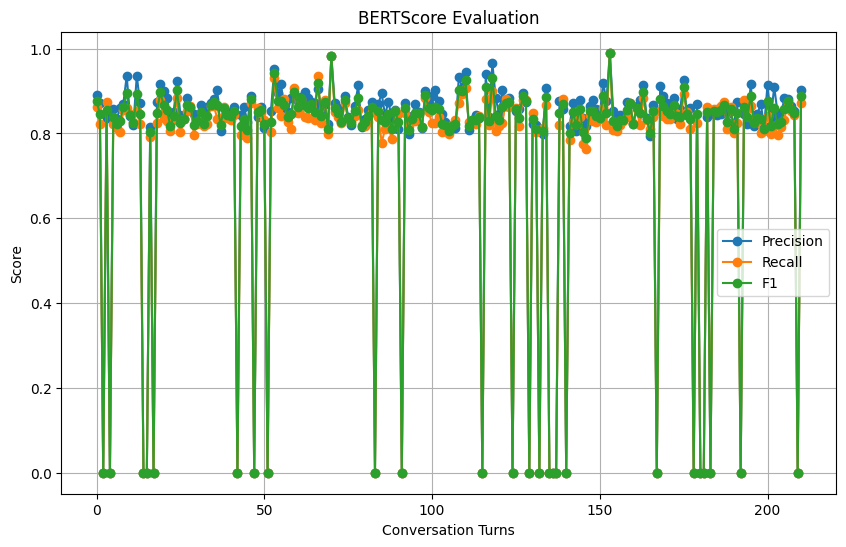

In [31]:
import matplotlib.pyplot as plt

precision = results['precision']
recall = results['recall']
f1 = results['f1']

plt.figure(figsize=(10, 6))
plt.plot(precision, label='Precision', marker='o')
plt.plot(recall, label='Recall', marker='o')
plt.plot(f1, label='F1', marker='o')

plt.title('BERTScore Evaluation')
plt.xlabel('Conversation Turns')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
